# RentSmart dataset Analysis (2016-present)
Dataset source: https://data.boston.gov/dataset/rentsmart


In [2]:
import pandas as pd
import numpy as np
import folium
from folium import plugins, Map
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/Users/mariashevchuk/Downloads/RentSmart_2016-present.csv')
# remove duplicate data points
df = df.drop_duplicates()
df.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"26-28 Isabella St, 02116",Boston,2116,501114000,TWENTY-6-28 ISABELLA ST COND,1899.0,2003.0,Condominium Main*,42.348620,-71.070480
1,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"254-256 Friend St, 02114",Boston,2114,301655000,PIZZUTI DONATO F,1899.0,2016.0,Mixed Use (Res. and Comm.),42.364488,-71.061337
2,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"293-295 Commonwealth Ave, 02115",Boston,2115,503569000,TWO 93 295 COMM AVE CONDO TR,1999.0,2018.0,Condominium Main*,42.350340,-71.085530
3,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"125 Salem St # 3, 02113",Boston,2113,302371000,MORAN RITA,1920.0,2002.0,Mixed Use (Res. and Comm.),42.364660,-71.055360
4,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"34 Isabella St, 02116",Boston,2116,501112000,CHRISTO WILLIAM TRST ETAL,1899.0,1980.0,Residential 7 or more units,42.348610,-71.070770


<ipython-input-4-9a68602f37be>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(df['violation_type'].unique()),df['violation_type'].value_counts())


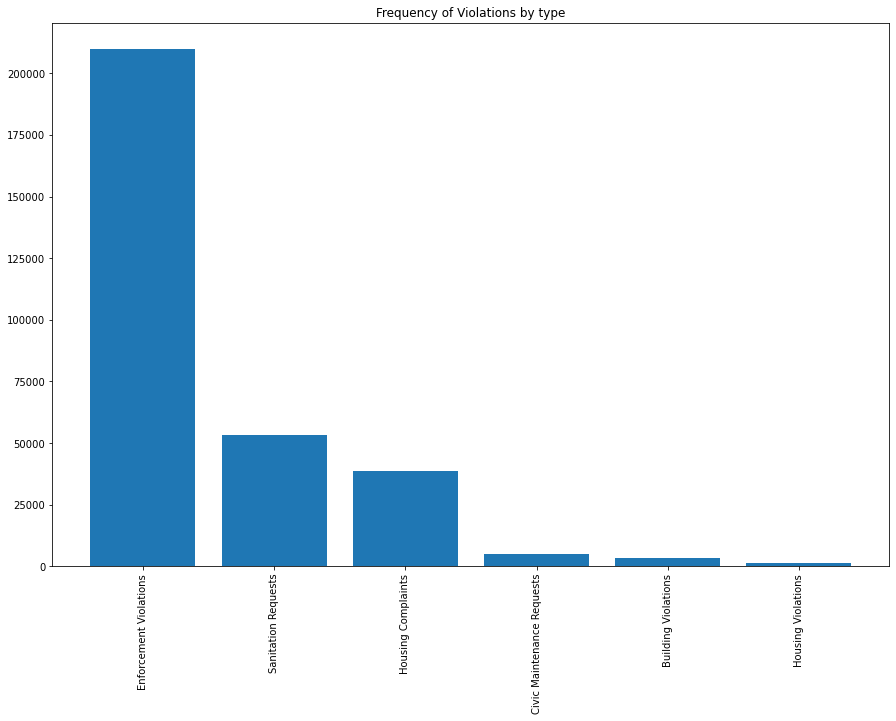

In [4]:
plt.figure(figsize =[15, 10])
plt.title('Frequency of Violations by type')
plt.subplot().bar(list(df['violation_type'].unique()),df['violation_type'].value_counts())
plt.xticks(rotation=90)
plt.show()


<ipython-input-5-bd5c3107f8b0>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(enf_volations['description'].unique()),enf_volations['description'].value_counts())


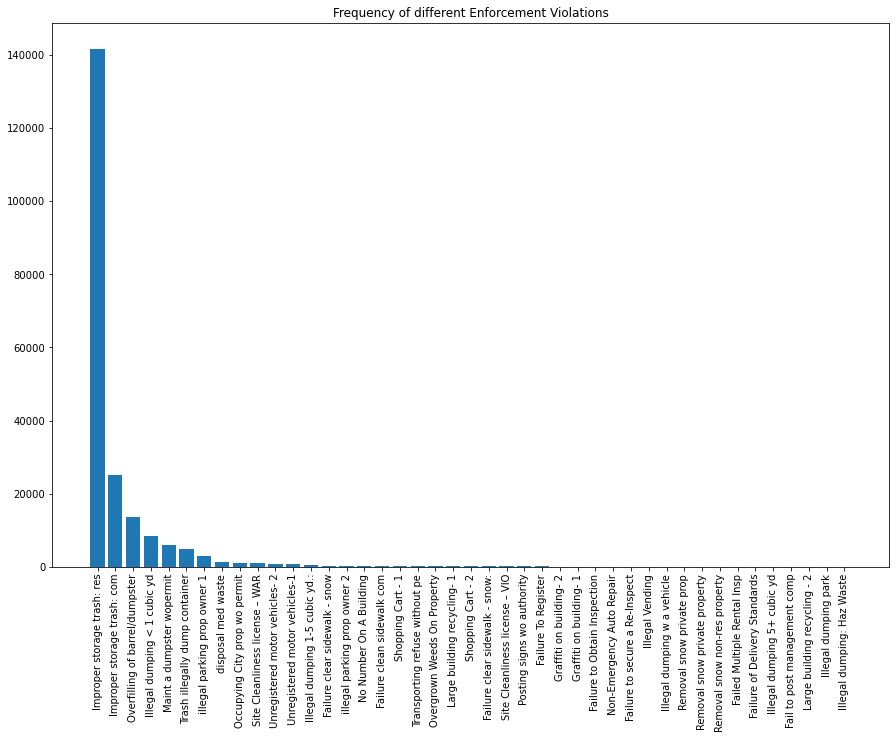

In [5]:
enf_volations = df[df['violation_type'] == 'Enforcement Violations']
plt.figure(figsize =[15, 10])
plt.title('Frequency of different Enforcement Violations')
plt.subplot().bar(list(enf_volations['description'].unique()),enf_volations['description'].value_counts())
plt.xticks(rotation=90)
plt.show()


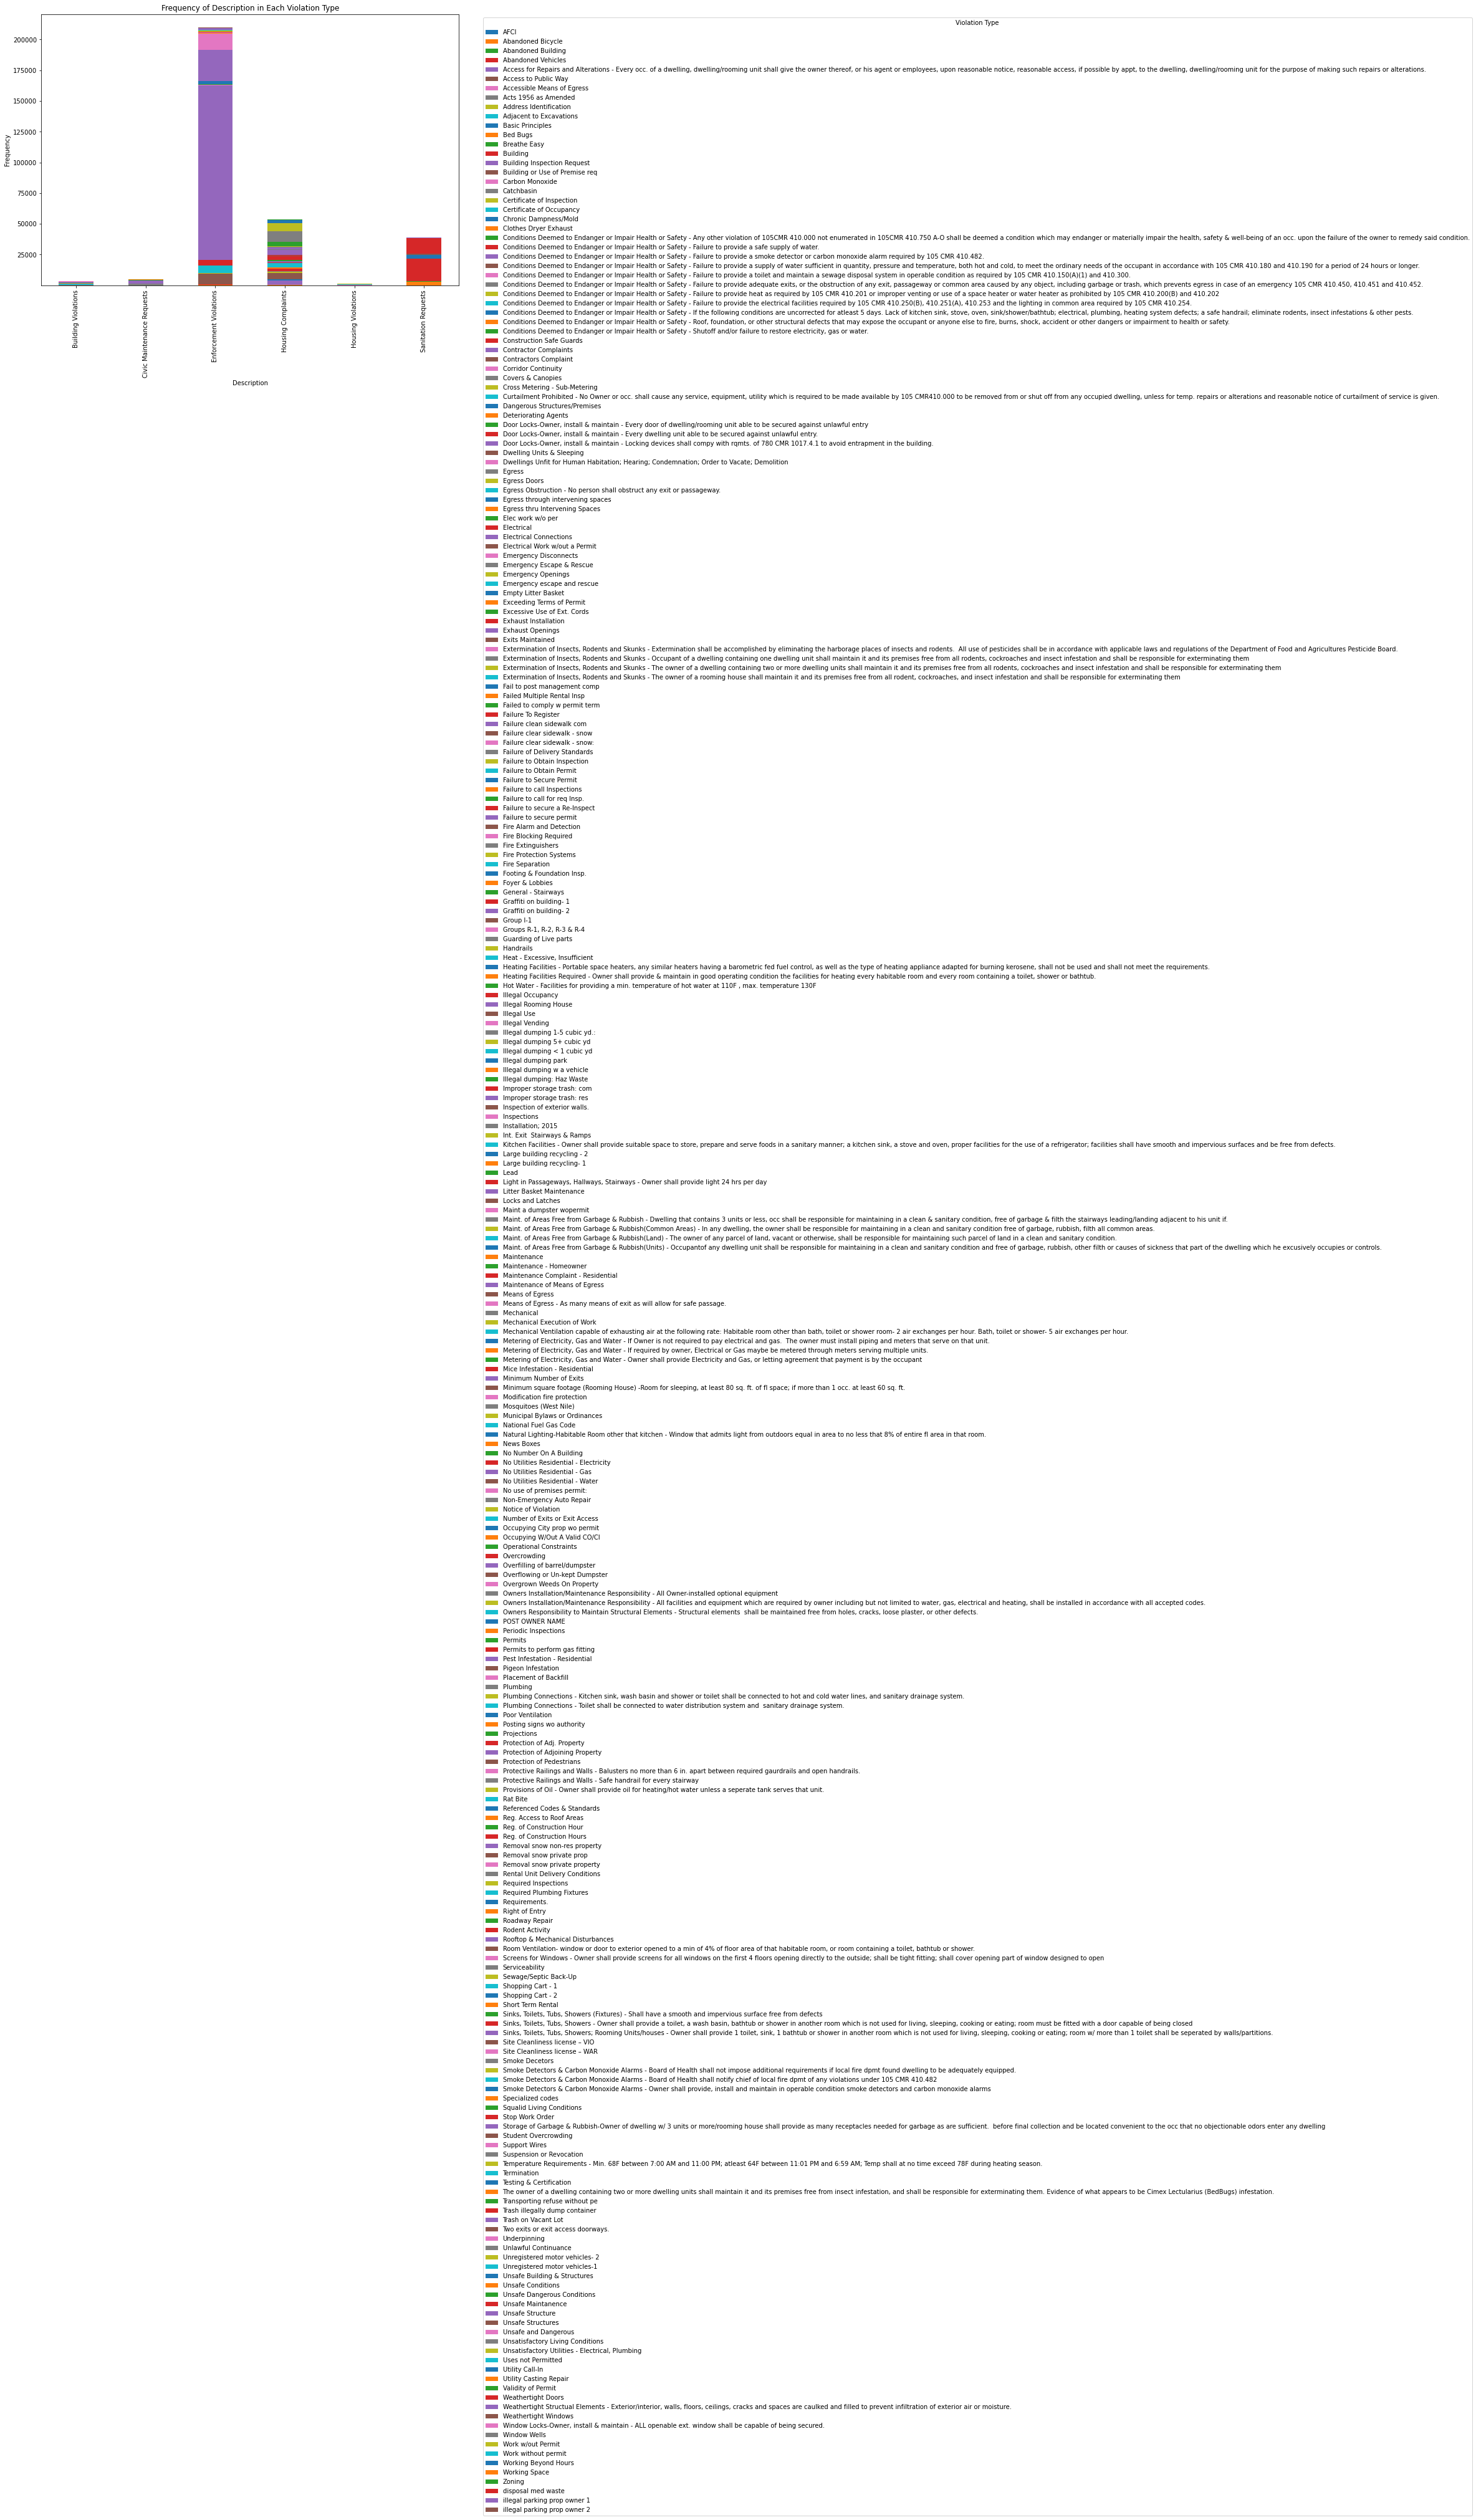

In [6]:
# Group by violation type and description
grouped = df.groupby(['violation_type', 'description']).size().reset_index(name='count')

# Pivot the table to create a stacked plot
pivot = grouped.pivot(index='violation_type', columns='description', values='count')

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))
pivot.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Description')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Description in Each Violation Type')
plt.legend(title='Violation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

<ipython-input-7-23c9449daff7>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(city['neighborhood'].unique()),city['neighborhood'].value_counts())


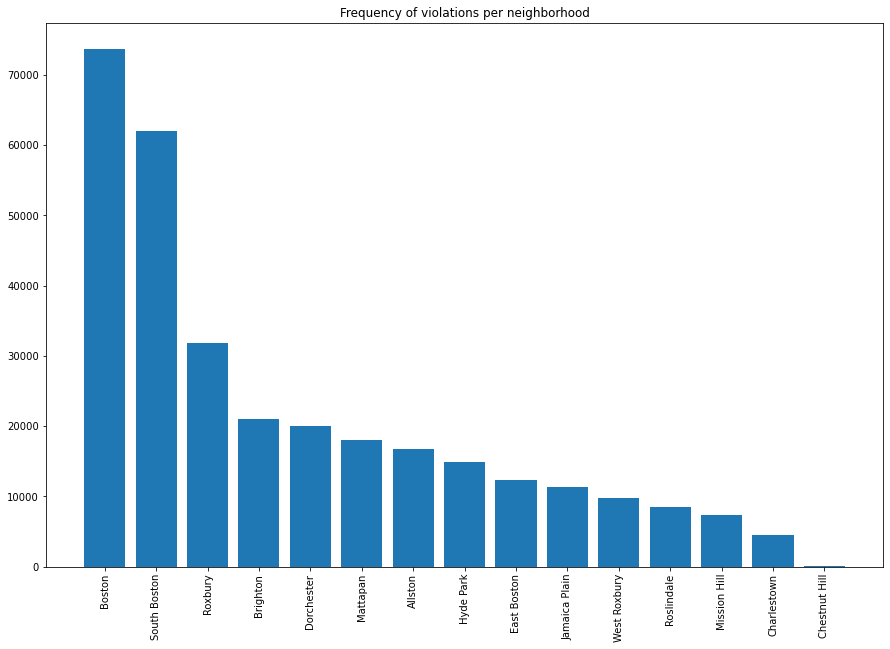

In [7]:
city = df[df['neighborhood'].notna()]
plt.figure(figsize =[15, 10])
plt.title('Frequency of violations per neighborhood')
plt.subplot().bar(list(city['neighborhood'].unique()),city['neighborhood'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [8]:
locations = df[['latitude', 'longitude']]
location_list = locations.values.tolist()

map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
# Add markers for each violation
for point in range(0, len(location_list)):
    folium.Marker(location_list[point]).add_to(map)
map

<ipython-input-28-272472f6c277>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(df['description'].unique()),df['description'].value_counts())


TypeError: 'value' must be an instance of str or bytes, not a float

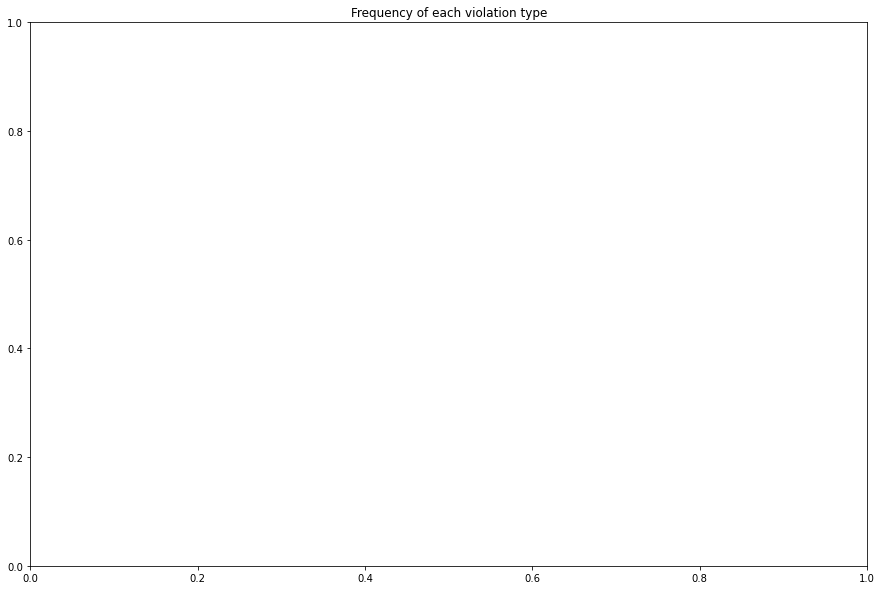

In [ ]:
plt.figure(figsize =[15, 10])
plt.title('Frequency of each violation type')
plt.subplot().bar(list(df['description'].unique()),df['description'].value_counts())
plt.show()

